In [1]:
import pandas as pd
import os
os.getcwd()

'C:\\Users\\Admin\\Desktop\\Python Training'

In [2]:
movie = pd.read_csv('C:\\Users\\Admin\\Desktop\\Python Training\\P4-Movie-Ratings.csv')

In [3]:
movie.head()


,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [4]:
movie.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [5]:
movie.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating', 'BudgetMillions', 'Year']

In [6]:
movie.describe()


,CriticRating,AudienceRating,BudgetMillions,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [7]:
movie.Film = movie.Film.astype('category')

In [8]:
movie.Year = movie.Year.astype('category')
movie.Genre = movie.Genre.astype('category')

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

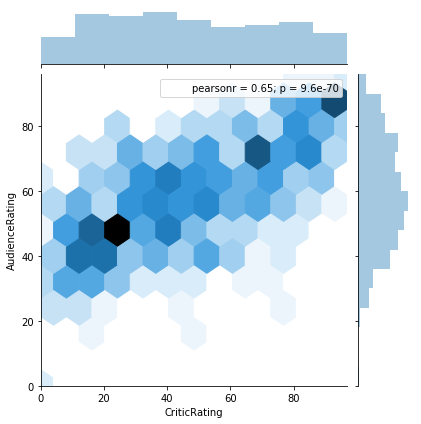

In [10]:
# Joint Plot

j = sns.jointplot(data= movie, x = 'CriticRating', y = 'AudienceRating',kind = 'hex')

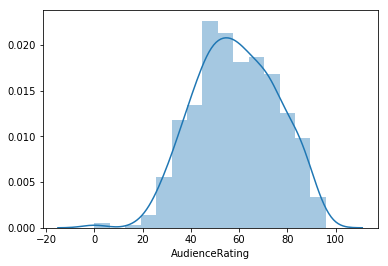

In [11]:
m1 = sns.distplot(movie.AudienceRating, bins = 15)

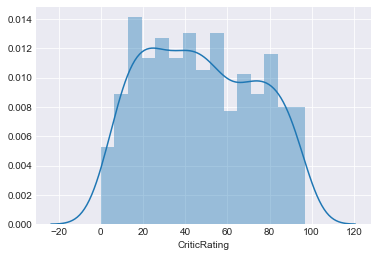

In [40]:
sns.set_style('darkgrid')
m2 = sns.distplot(movie.CriticRating, bins = 15)

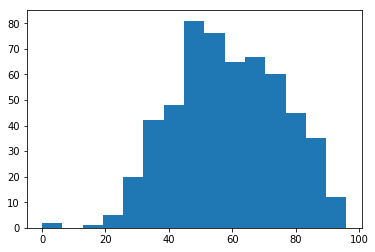

In [39]:
#char2 
n1 = plt.hist(movie.AudienceRating, bins = 15)

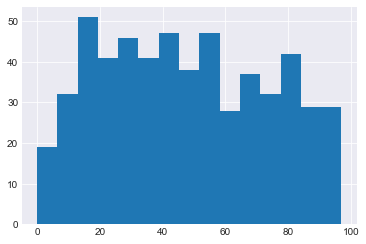

In [41]:
#chart3

n2 = plt.hist(movie.CriticRating, bins = 15)


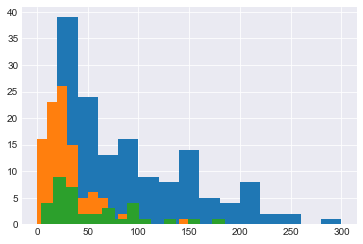

In [48]:
#stacked histogram
#movie[movie.genre == 'Drama'].BudgetMillions
plt.hist(movie[movie.Genre == 'Action'].BudgetMillions, bins = 15)
plt.hist(movie[movie.Genre == 'Drama'].BudgetMillions, bins = 15)
plt.hist(movie[movie.Genre == 'Thriller'].BudgetMillions, bins = 15)
plt.show()

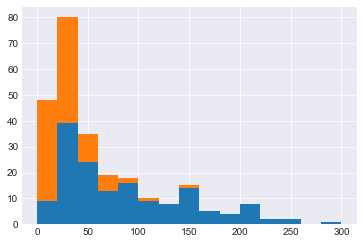

In [50]:
plt.hist([movie[movie.Genre == 'Action'].BudgetMillions, movie[movie.Genre == 'Drama'].BudgetMillions], bins = 15, stacked = 'True')
plt.show()

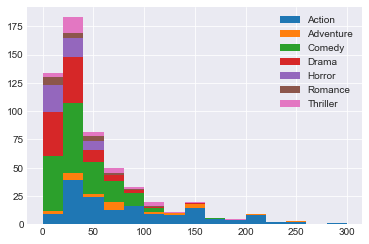

In [59]:
#movie.Genre.cat.categories; Chart # 4
list1 = []
mylabels = []
for Gen in movie.Genre.cat.categories:
    list1.append(movie[movie.Genre == Gen].BudgetMillions)
    mylabels.append(Gen)
#print(list1)   
h = plt.hist(list1, bins = 15, stacked = 'True', rwidth = 1, label =mylabels)
plt.legend()

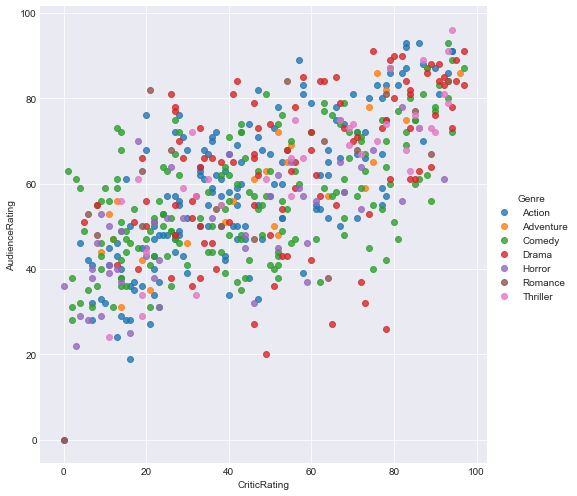

In [61]:
#KDE Kernel Density 

vis1 = sns.lmplot(data = movie, x = 'CriticRating', y = 'AudienceRating', fit_reg = False, hue = 'Genre', size = 7)

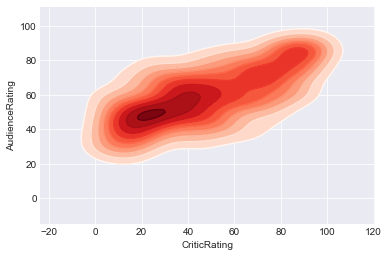

In [66]:
#chart 5
k1 = sns.kdeplot(movie.CriticRating, movie.AudienceRating, shade = True, shade_lowest = False, cmap = 'Reds')

k2 = sns.kdeplot(movie.CriticRating, movie.AudienceRating, cmap = 'Reds')



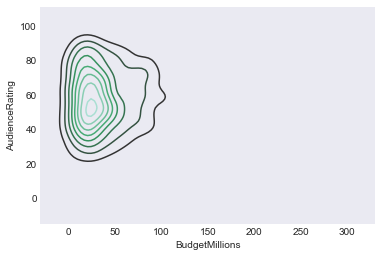

In [68]:
# Subplots
sns.set_style('dark')
k3 = sns.kdeplot(movie.BudgetMillions, movie.AudienceRating)

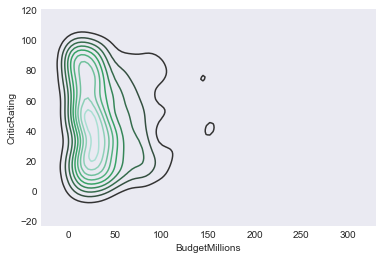

In [69]:
# Subplots
sns.set_style('dark')
k3 = sns.kdeplot(movie.BudgetMillions, movie.CriticRating)

[(-20, 160)]

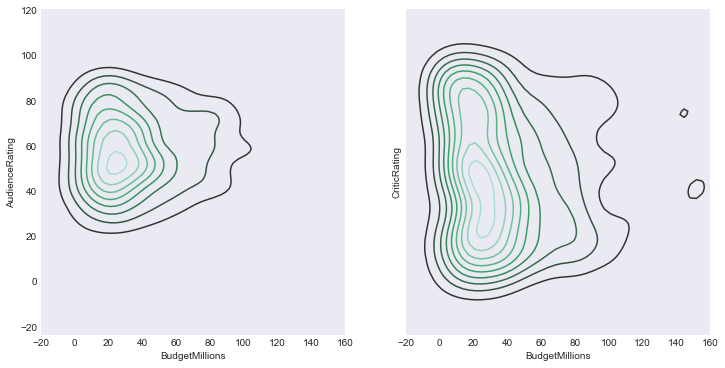

In [75]:
#Chart 6
f, axes = plt.subplots(1,2, figsize = (12,6), sharex = True, sharey = True)
k3 = sns.kdeplot(movie.BudgetMillions, movie.AudienceRating, ax = axes[0])
k4 = sns.kdeplot(movie.BudgetMillions, movie.CriticRating, ax = axes[1])
k3.set(xlim =(-20,160))

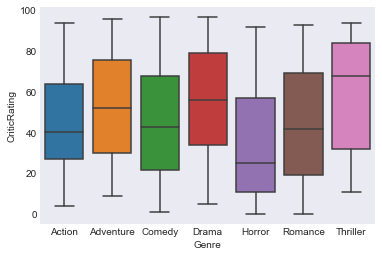

In [78]:
w = sns.boxplot(data = movie, x = 'Genre', y = 'CriticRating')


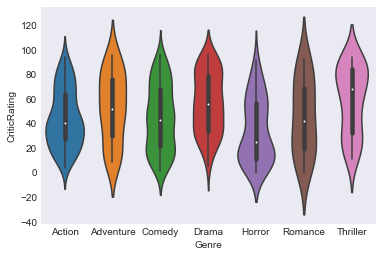

In [79]:
z = sns.violinplot(data = movie, x = 'Genre', y = 'CriticRating')

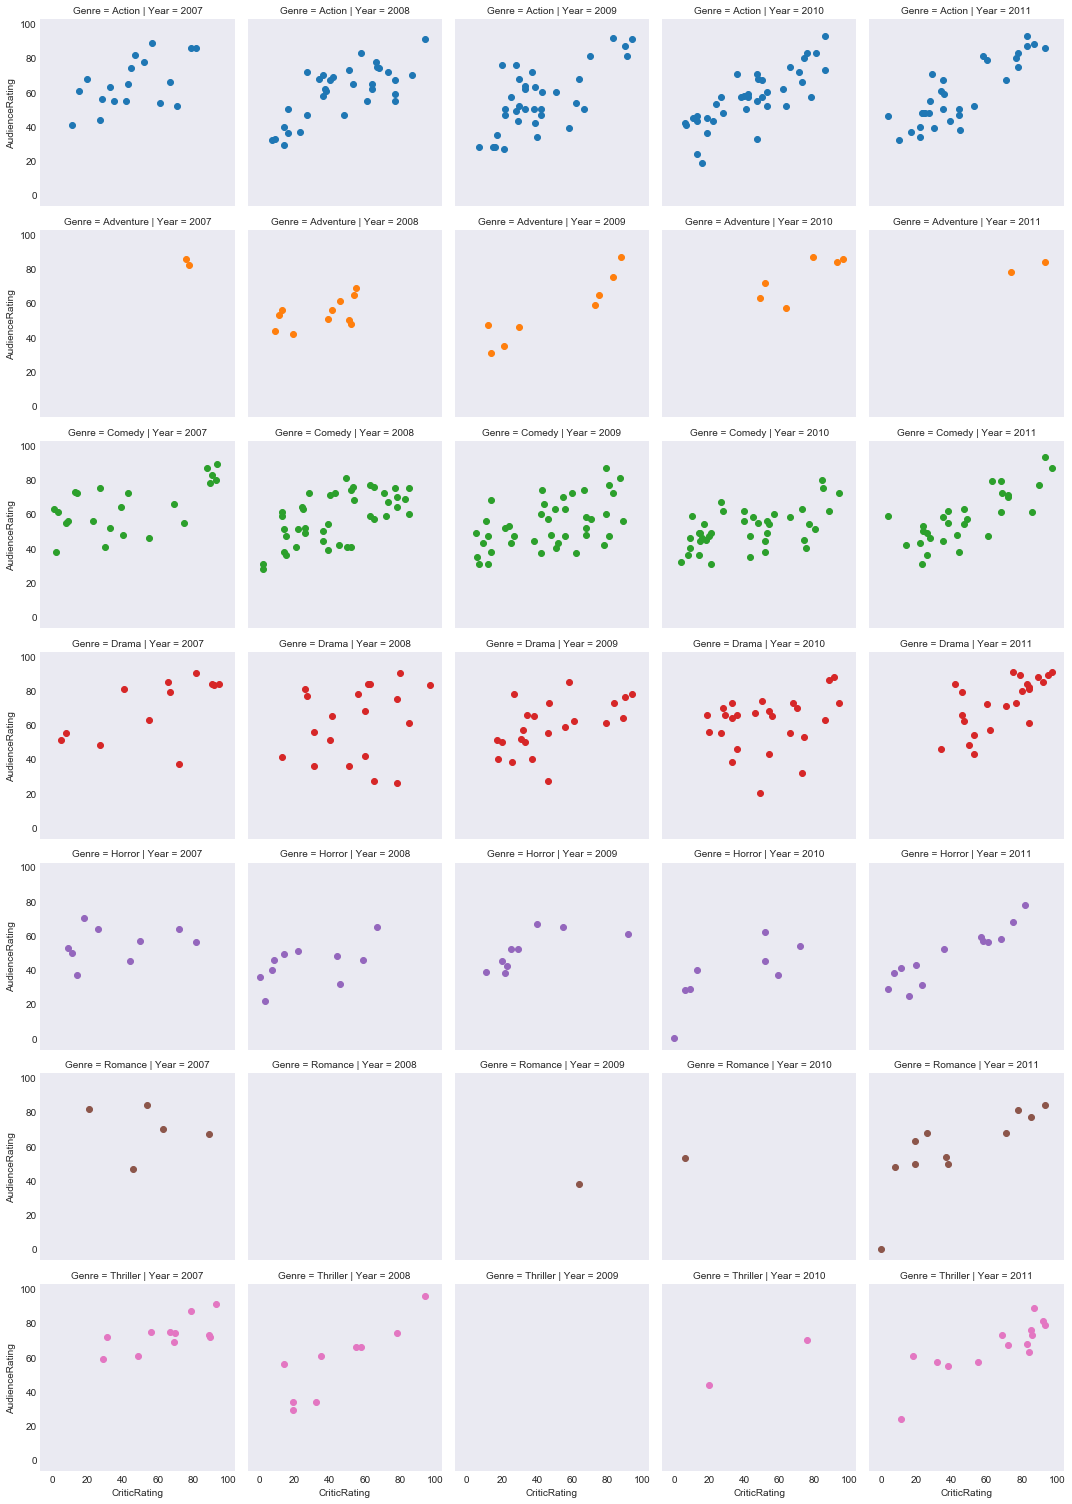

In [84]:
# Facet Grid
g = sns.FacetGrid(movie, row = 'Genre', col = 'Year', hue = 'Genre')
g = g.map(plt.scatter,'CriticRating','AudienceRating' )


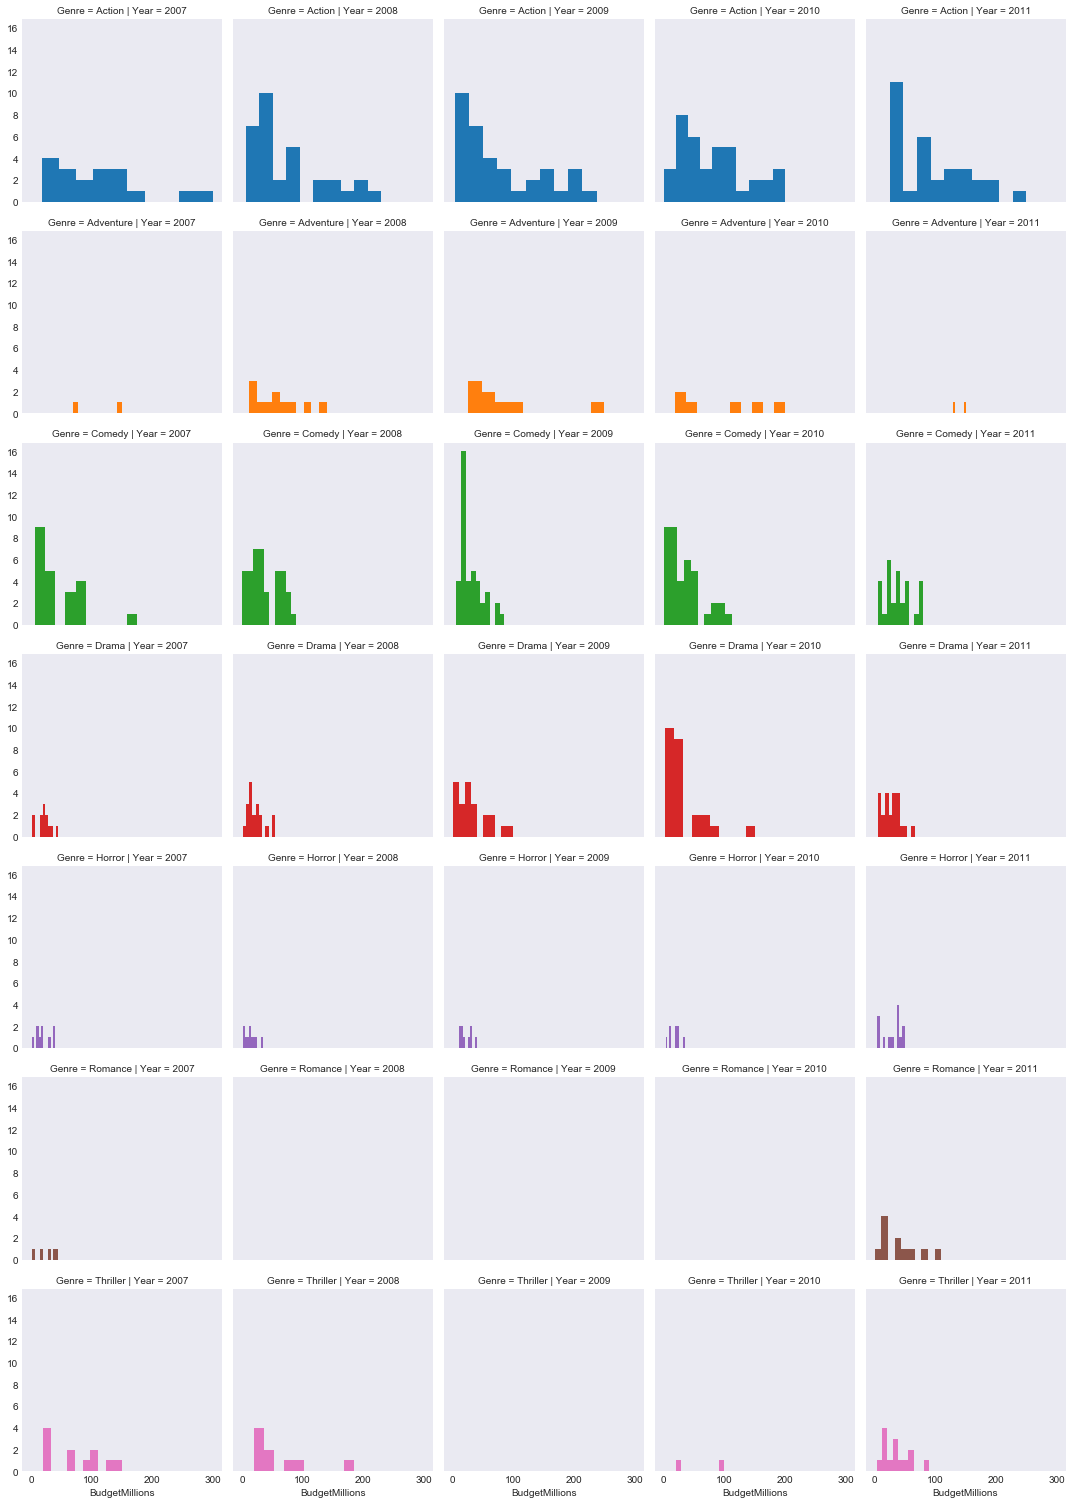

In [86]:
g = sns.FacetGrid(movie, row = 'Genre', col = 'Year', hue = 'Genre')
g = g.map(plt.hist,'BudgetMillions' )

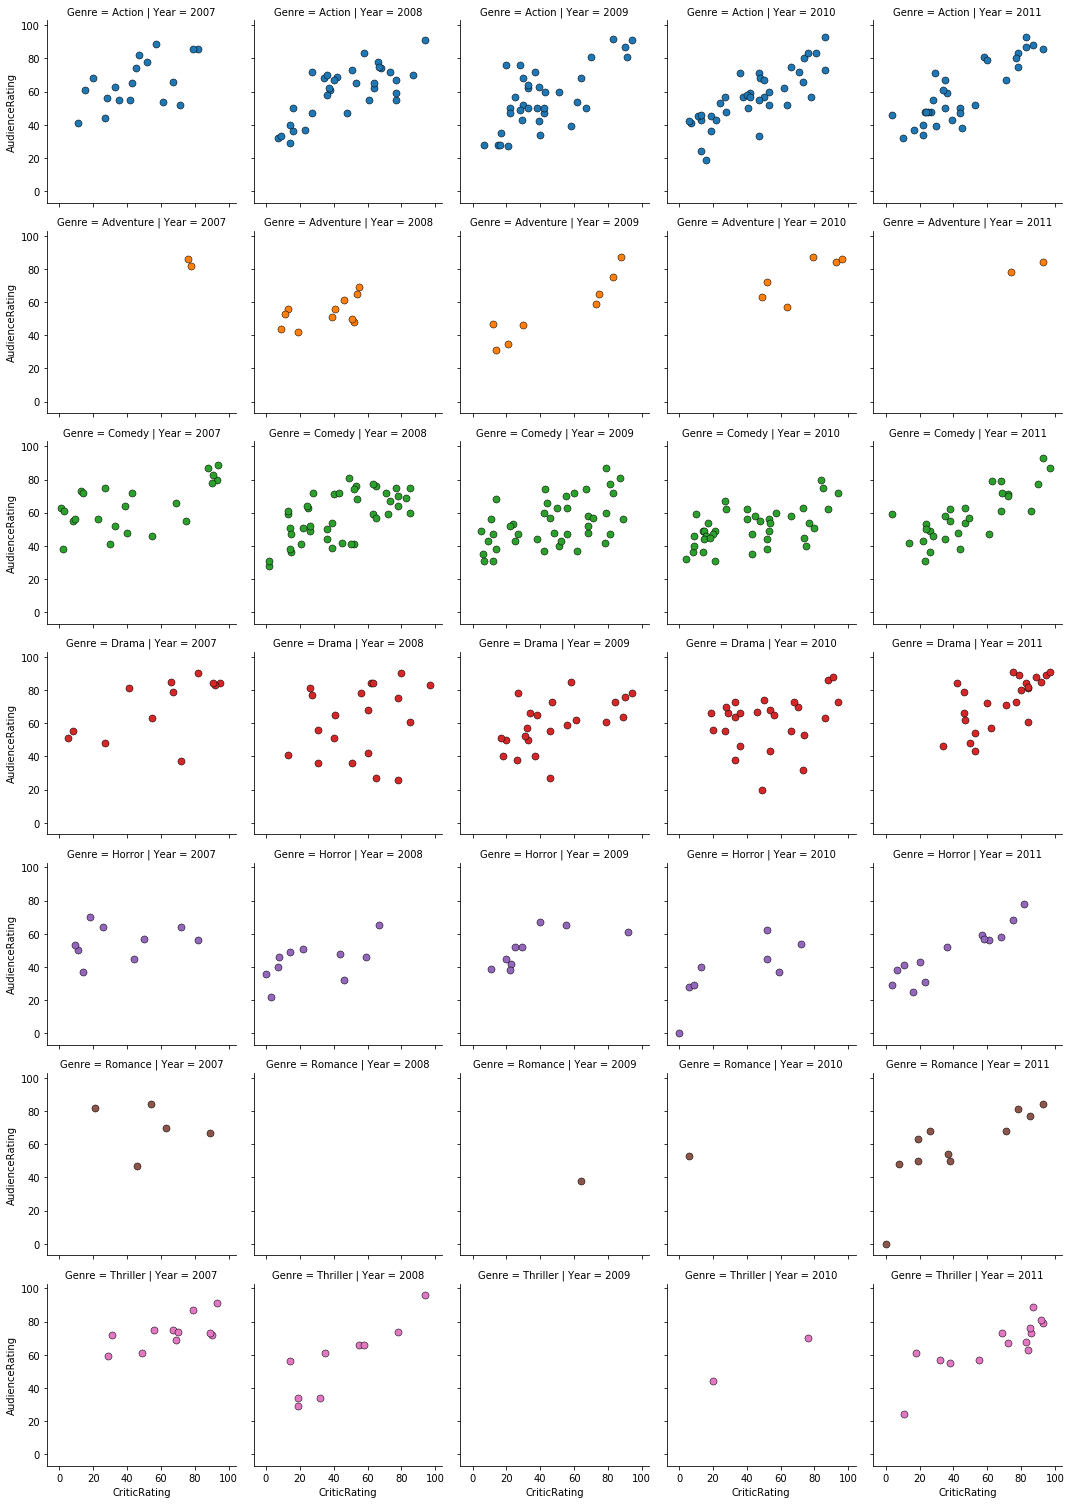

In [12]:
g = sns.FacetGrid(movie, row = 'Genre', col = 'Year', hue = 'Genre')
kws = dict(s=50, linewidth =0.5, edgecolor = 'black')
g = g.map(plt.scatter,'CriticRating','AudienceRating', **kws )

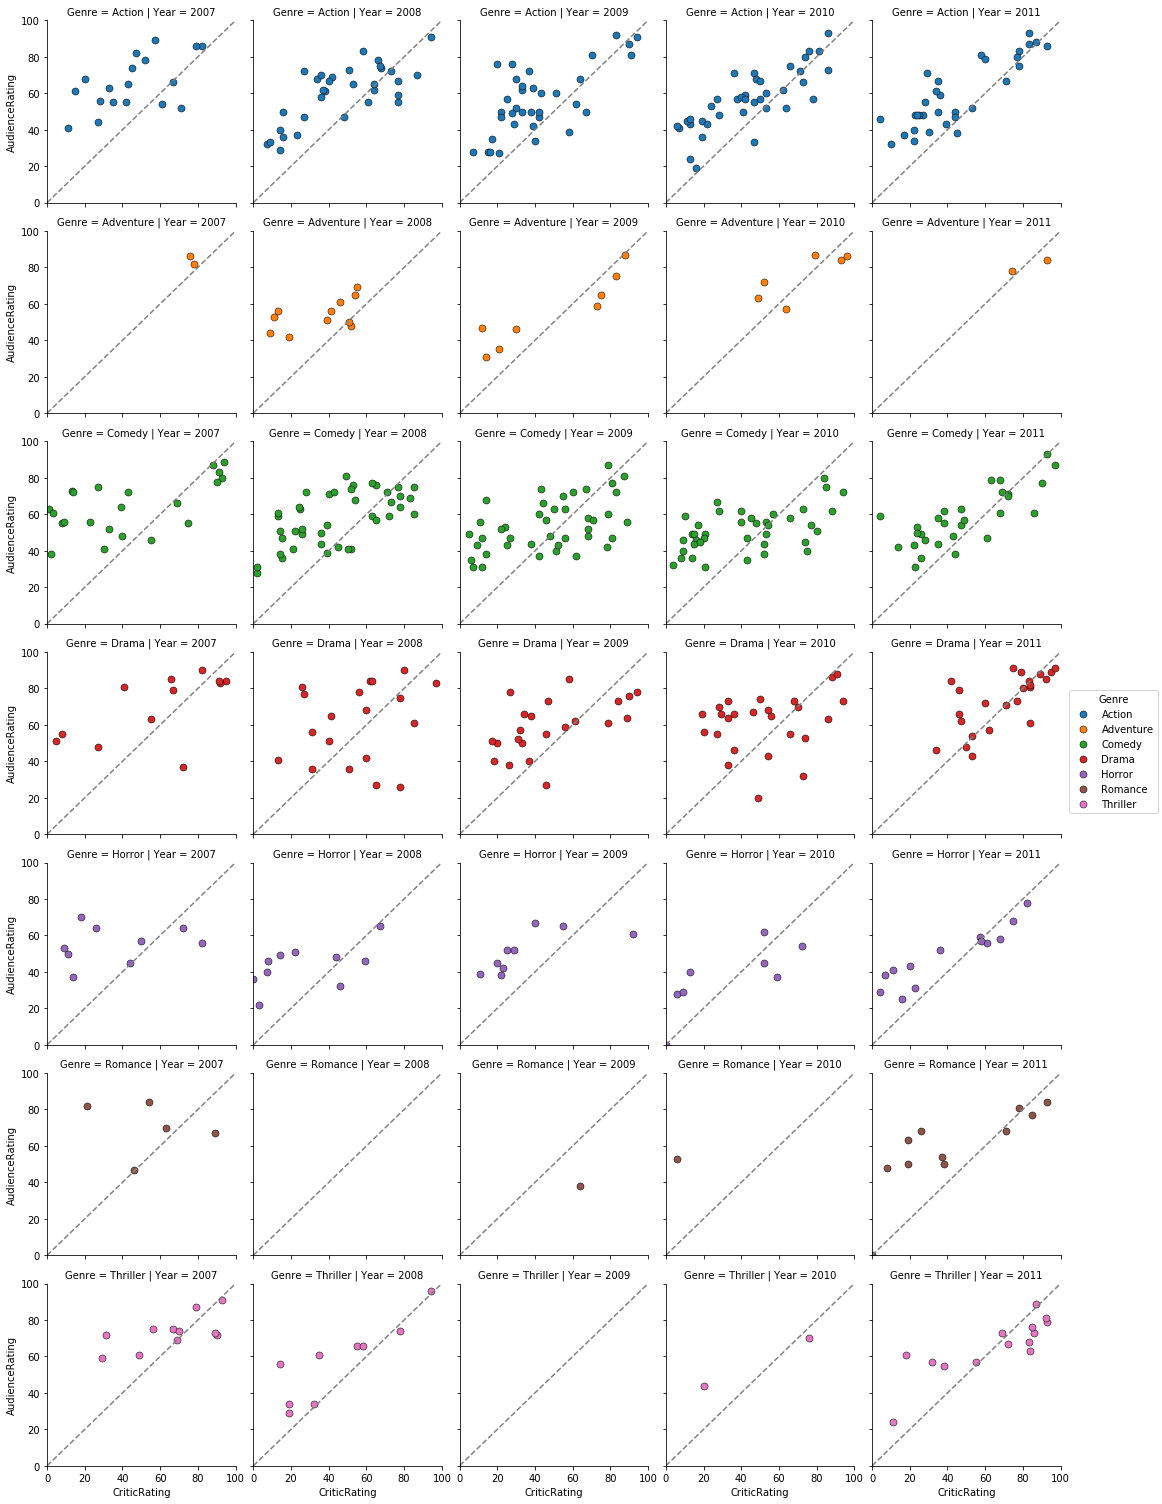

In [18]:
g = sns.FacetGrid(movie, row = 'Genre', col = 'Year', hue = 'Genre')
kws = dict(s=50, linewidth =0.5, edgecolor = 'black')
g = g.map(plt.scatter,'CriticRating','AudienceRating', **kws )
g.set(xlim=(0,100),ylim=(0,100))
for ax in g.axes.flat:
    ax.plot((0,100), (0,100), c = 'gray', ls = '--')
g.add_legend()

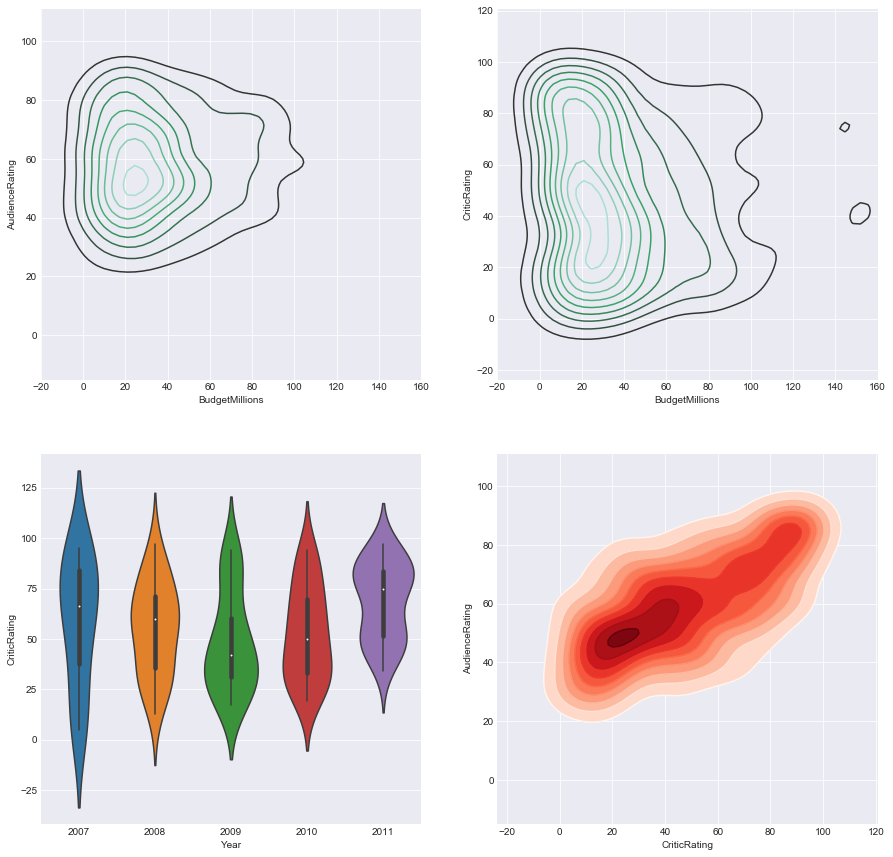

In [34]:
# building dashboards
sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize = (15,15))
k1 = sns.kdeplot(movie.BudgetMillions, movie.AudienceRating, ax = axes[0,0])
k2 = sns.kdeplot(movie.BudgetMillions, movie.CriticRating, ax = axes[0,1])
z = sns.violinplot(data = movie[movie.Genre == 'Drama'], x= 'Year', y = 'CriticRating' ,ax = axes[1,0])
k3 = sns.kdeplot(movie.CriticRating, movie.AudienceRating, shade = True, shade_lowest = False, cmap = 'Reds' , ax = axes[1,1])
k3b = sns.kdeplot(movie.CriticRating, movie.AudienceRating, cmap = 'Reds' , ax = axes[1,1])
#n1 = axes[1,1].hist(movie.CriticRating, bins = 15 )
k1.set(xlim=(-20, 160))
k2.set(xlim=(-20, 160))
plt.show()


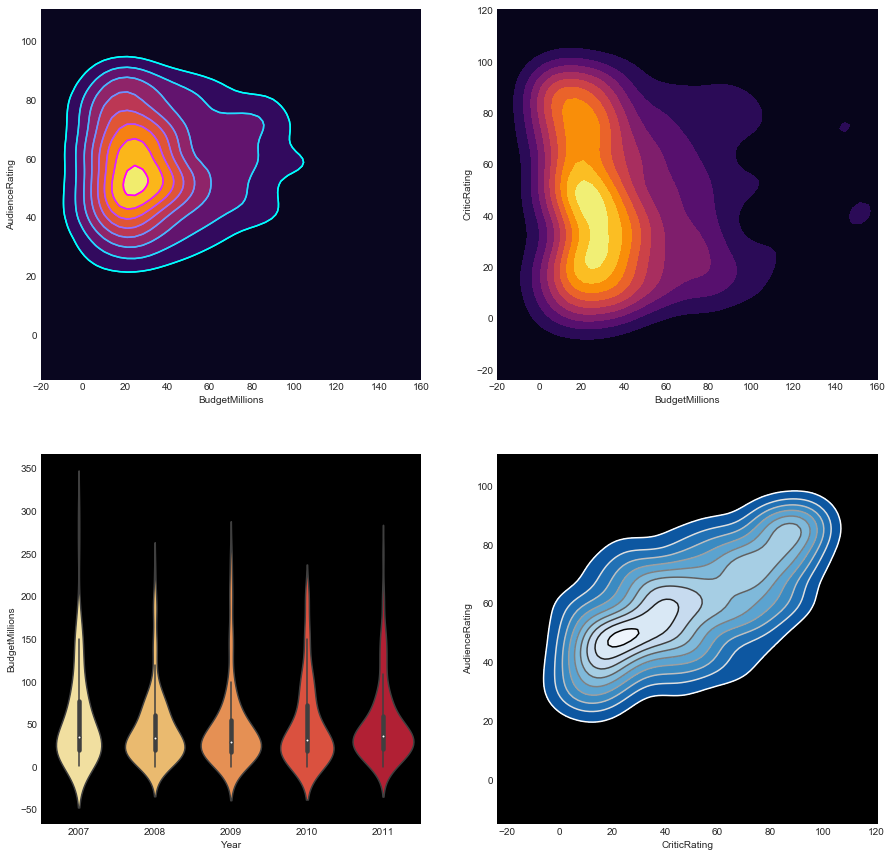

In [48]:
# styling
sns.set_style('dark', {'axes.facecolor': 'black'})
f, axes = plt.subplots(2,2, figsize = (15,15))
k1 = sns.kdeplot(movie.BudgetMillions, movie.AudienceRating, ax = axes[0,0], shade = True, shade_lowest = True, cmap = 'inferno')
k1b = sns.kdeplot(movie.BudgetMillions, movie.AudienceRating, ax = axes[0,0],  cmap = 'cool')

k2 = sns.kdeplot(movie.BudgetMillions, movie.CriticRating, ax = axes[0,1],shade = True, shade_lowest = True, cmap = 'inferno')
k2b = sns.kdeplot(movie.BudgetMillions, movie.AudienceRating, ax = axes[0,0],  cmap = 'cool')

z = sns.violinplot(data = movie, x= 'Year', y = 'BudgetMillions' ,ax = axes[1,0], palette = 'YlOrRd')

k3 = sns.kdeplot(movie.CriticRating, movie.AudienceRating, shade = True, shade_lowest = False, cmap = 'Blues_r' , ax = axes[1,1])
k3b = sns.kdeplot(movie.CriticRating, movie.AudienceRating, cmap = 'gist_gray_r' , ax = axes[1,1])
#n1 = axes[1,1].hist(movie.CriticRating, bins = 15 )
k1.set(xlim=(-20, 160))
k2.set(xlim=(-20, 160))
plt.show()


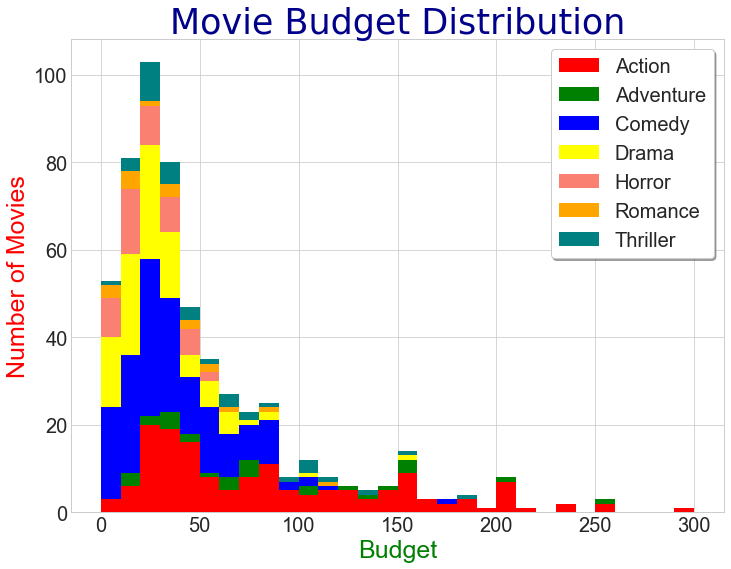

In [67]:
list1 = []
mylabels = []

for Gen in movie.Genre.cat.categories:
    list1.append(movie[movie.Genre == Gen].BudgetMillions)
    mylabels.append(Gen)
sns.set_style('whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.7)
h= plt.hist(list1, bins = 30, stacked = True, rwidth = 1, label = mylabels, color = ['Red', 'Green', 'Blue','Yellow','Salmon', 'Orange', 'Teal'])
plt.title('Movie Budget Distribution', fontsize = 35, color ='DarkBlue', fontname = 'console')
plt.ylabel('Number of Movies', fontsize = 25, color ='Red')
plt.xlabel('Budget', fontsize = 25, color ='Green')   
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(frameon = True, fancybox = True, shadow = True ,prop = {'size':20})
plt.show()